In [1]:
# Analysis Top 50 Spotify Tracks of 2021
# At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2021) includes 50 songs. The question is: What do these top songs have in common? Why do people like them?

# Original Data Source: The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

# Data Description: There is one .csv file in the dataset. (spotify_top50_2021.csv) This file

# includes:

# Spotify URI for the song
# Name of the song
# Artist(s) of the song
# Audio features for the song (such as danceability, tempo, key etc.)
# A more detailed explanation of the audio features can be found in the Metadata tab.
# Exploring the Data:

# We will look for patterns in the audio features of the songs. Why do people stream these songs the most?
# We will try to predict one audio feature based on the others
# We will see which features correlate the most

# NOTE: At the end of this notebook we will be providing the conclusions of the study


In [2]:
# Import libraries
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [3]:
df = pd.read_csv("..\spotipy_tutorial\spotify_top50_2021.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

In [4]:
# We make the conversion of the column duration to place it in standard format (minutes:seg )
df["Duration_min"] = df["duration_ms"] / 60000
df.drop(columns="duration_ms", inplace=True)


In [5]:
# The id column is useless for our study so we will also drop it
df.drop(columns="id", inplace=True)


In [6]:
df.drop(columns="popularity", inplace=True)


<AxesSubplot:>

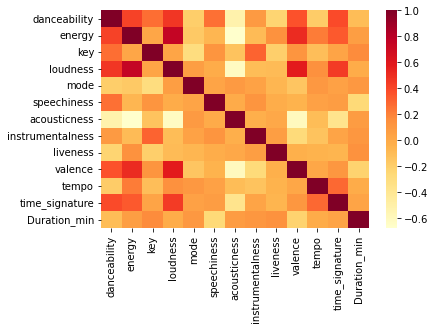

In [7]:
# Identification of correlations between columns.
# In this step we will help you with the corr () function of pandas and then we will make a heat map that will clearly show the correlations between certain columns, although the ideal thing before this step is to have an idea of ​​the columns that will have a possible correlation.
sns.heatmap(df.corr(), cmap="YlOrRd")


In [8]:
# ANALYSIS:
# We can observe in the strongest tones the existing correlations between the different columns, at first glance the "loudness and energy" columns call our attention but our duty is to explore the behavior of each one of the variables.


In [9]:
# Top 10 artists with the largest presence in the Top 50
df["artist_name"].value_counts().head(10)


Olivia Rodrigo    4
Doja Cat          4
Bad Bunny         3
Dua Lipa          2
Måneskin          2
Lil Nas X         2
Ariana Grande     2
BTS               2
The Weeknd        2
The Kid LAROI     2
Name: artist_name, dtype: int64

c:\Users\amaur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='danceability', ylabel='Density'>

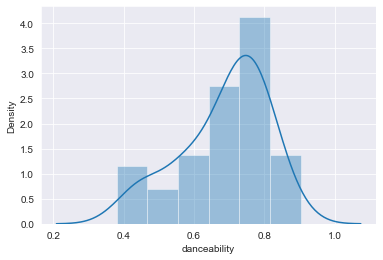

In [10]:
# Danceablity column analysis
sns.set_style(style="darkgrid")
sns.distplot(df["danceability"], hist=True, kde=True)


In [11]:
# ANALYSIS: In this graph we can see that most of the tracks are considered danceable from values ​​higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:

# Greater than 75% --- Very danceable
# Between 50% and 74% - Regularly danceable
# Minor 50% - non-danceable or instrumental music


In [12]:
# Set conditions
Vd = df["danceability"] >= 0.75
Ld = (df["danceability"] >= 0.5) & (df["danceability"] < 0.75)
Nd = df["danceability"] < 0.5


In [13]:
# Create DataFrame
data = [Vd.sum(), Ld.sum(), Nd.sum()]
Dance = pd.DataFrame(
    data, columns=["percent"], index=["Very", "Regular", "Instrumental"]
)


In [14]:
Dance


,percent
Very,18
Regular,27
Instrumental,5


c:\Users\amaur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

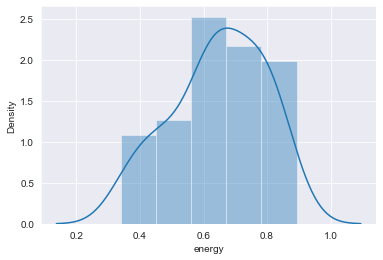

In [15]:
# Energy column analysis
sns.distplot(df["energy"])


In [16]:
Ve = df["energy"] >= 0.75
Re = (df["energy"] >= 0.5) & (df["energy"] <= 0.75)
Le = df["energy"] < 0.5


In [17]:
Data = [Ve.sum(), Re.sum(), Le.sum()]
Energy = pd.DataFrame(
    data, columns=["percent"], index=["Very Energy", "Regular Energy", "Low Energy"]
)


In [18]:
Energy


,percent
Very Energy,18
Regular Energy,27
Low Energy,5


In [19]:
# Correlation Zone
# In this area we will take into account the most important variables according to the preliminary analysis of the heat maps previously seen


In [20]:
Correlation = df[["danceability", "energy", "valence", "loudness", "tempo"]]


<AxesSubplot:>

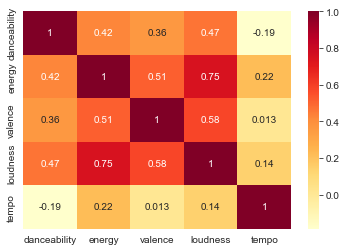

In [21]:
sns.heatmap(Correlation.corr(), annot=True, cmap="YlOrRd")


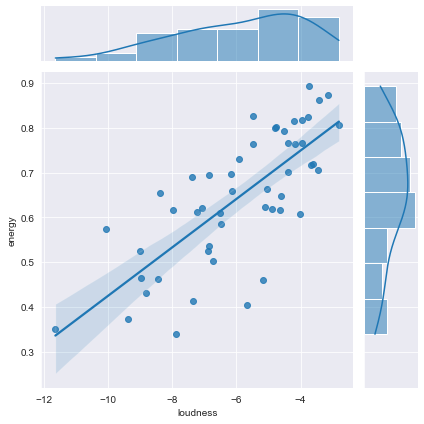

In [22]:
sns.jointplot(data=Correlation, y="energy", x="loudness", kind="reg")


In [23]:
# ANALYSIS:
# We can clearly observe that as the values ​​of loudness are closer to zero the probability that our song has a high content of rhythms is higher, in general these values ​​should be kept below zero but not very far away


In [24]:
# What is the musical tempo?
# At first the musical scores did not give us indications about the tempo or they were very scarce, so each interpreter performed it at ease, but the idea of ​​the tempo begins to change from the eighteenth and nineteenth century, possibly as a consequence of the fact that composers will be tired of listening to interpretations of their works with completely arbitrary times. Then came a notation that expressed the "speed" or form that the works should be executed.

# The 5 most usual ones were:

# Length: very slow (20 bpm)
# Adagio: slow and majestic (66 to 76 bpm)
# Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
# Allegro: animated and fast. (110 to 168 bpm).
# Presto: very fast (168 to 200 bpm).


In [25]:
# Classification according to the tempo of the track
df["Rythm"] = df["tempo"]


In [26]:
df.loc[df["tempo"] > 168, "Rythm"] = "Presto"
df.loc[(df["tempo"] >= 110) & (df["tempo"] <= 168), "Rythm"] = "Allegro"
df.loc[(df["tempo"] >= 76) & (df["tempo"] <= 110), "Rythm"] = "Andante"
df.loc[(df["tempo"] >= 76) & (df["tempo"] <= 66), "Rythm"] = "Adagio"
df.loc[df["tempo"] < 65, "Rythm"] = "Length"


In [27]:
df["Rythm"].value_counts()


Allegro    23
Andante    20
Presto      6
72.017      1
Name: Rythm, dtype: int64

Text(0.5, 1.0, 'Popular keys')

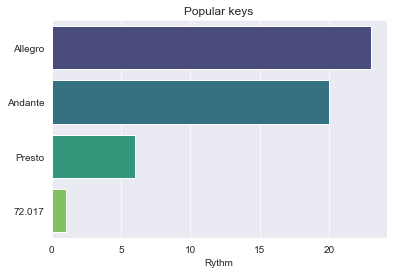

In [28]:
sns.set_style(style="darkgrid")
Rhy = df["Rythm"].value_counts()
Rhy_DF = pd.DataFrame(Rhy)
sns.barplot(x=Rhy_DF.Rythm, y=Rhy_DF.index, palette="viridis")
plt.title("Popular keys")


In [29]:
# NOTE: As we can see these songs are influenced by the intermediate rhythms offered by the following genres:

# Hip hop
# reggaeton
# Pop
# Rap



In [30]:
# Top 10 of the most danceable songs
df[
    ["track_name", "artist_name", "danceability", "valence", "tempo", "Rythm"]
].sort_values(by="danceability", ascending=False).head(10)


,track_name,artist_name,danceability,valence,tempo,Rythm
45,Qué Más Pues?,J Balvin,0.903,0.732,102.014,Andante
35,LA NOCHE DE ANOCHE,Bad Bunny,0.856,0.391,81.993,Andante
38,Fiel,Los Legendarios,0.849,0.505,98.005,Andante
47,34+35,Ariana Grande,0.830,0.485,109.978,Andante
24,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,Riton,0.824,0.801,122.980,Allegro
42,Woman,Doja Cat,0.824,0.881,107.998,Andante
13,Bad Habits,Ed Sheeran,0.807,0.537,126.011,Allegro
41,Lemonade (feat. Gunna Don Toliver & NAV),Internet Money,0.800,0.462,140.042,Allegro
20,The Business,Tiësto,0.798,0.235,120.031,Allegro
40,Don't Start Now,Dua Lipa,0.793,0.679,123.950,Allegro


In [31]:
# Top 10 songs with the most energy
# Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
# Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
# Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

df[["track_name", "artist_name", "energy", "valence", "tempo", "Rythm"]].sort_values(
    by="energy", ascending=False
).head(10)


,track_name,artist_name,energy,valence,tempo,Rythm
13,Bad Habits,Ed Sheeran,0.893,0.537,126.011,Allegro
46,Head & Heart (feat. MNEK),Joel Corry,0.874,0.905,122.953,Allegro
24,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,Riton,0.862,0.801,122.980,Allegro
14,Save Your Tears,The Weeknd,0.826,0.644,118.051,Allegro
4,Levitating (feat. DaBaby),Dua Lipa,0.825,0.915,102.977,Andante
45,Qué Más Pues?,J Balvin,0.817,0.732,102.014,Andante
23,Watermelon Sugar,Harry Styles,0.816,0.557,95.390,Andante
37,Sweater Weather,The Neighbourhood,0.807,0.398,124.053,Allegro
30,positions,Ariana Grande,0.802,0.682,144.015,Allegro
9,Beggin',Måneskin,0.800,0.589,134.002,Allegro


In [32]:
# Top 10 songs more likely to create positive feelings
# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
df[["track_name", "artist_name", "energy", "valence", "tempo", "Rythm"]].sort_values(
    by="valence", ascending=False
).head(10)


,track_name,artist_name,energy,valence,tempo,Rythm
33,I WANNA BE YOUR SLAVE,Måneskin,0.608,0.958,132.507,Allegro
4,Levitating (feat. DaBaby),Dua Lipa,0.825,0.915,102.977,Andante
46,Head & Heart (feat. MNEK),Joel Corry,0.874,0.905,122.953,Allegro
12,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,0.691,0.892,150.087,Allegro
42,Woman,Doja Cat,0.764,0.881,107.998,Andante
49,Pareja Del Año,Sebastian Yatra,0.622,0.808,80.015,Andante
24,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,Riton,0.862,0.801,122.980,Allegro
6,Kiss Me More (feat. SZA),Doja Cat,0.705,0.781,110.970,Allegro
21,Dynamite,BTS,0.765,0.737,114.044,Allegro
45,Qué Más Pues?,J Balvin,0.817,0.732,102.014,Andante


In [33]:
# Analysis of artists with greater presence in the 50 most played songs of 2021
# We are going to analyze the 4 artists with more songs within the Top 50 to see taste patterns among the clients

df["artist_name"].value_counts().head(5)


Olivia Rodrigo    4
Doja Cat          4
Bad Bunny         3
Dua Lipa          2
Måneskin          2
Name: artist_name, dtype: int64

In [34]:
# Artist Olivia Rodrigo
OliviaR = df[df["artist_name"] == "Olivia Rodrigo"]


In [35]:
OliviaR[
    ["track_name", "danceability", "energy", "loudness", "valence", "tempo", "Rythm"]
]


,track_name,danceability,energy,loudness,valence,tempo,Rythm
0,drivers license,0.561,0.431,-8.810,0.1370,143.875,Allegro
3,good 4 u,0.563,0.664,-5.044,0.6880,166.928,Allegro
17,deja vu,0.442,0.612,-7.222,0.1780,180.917,Presto
28,traitor,0.380,0.339,-7.885,0.0849,100.607,Andante


In [36]:
# Artist Doja Cat
DojaC = df[df["artist_name"] == "Doja Cat"]


In [37]:
DojaC[["track_name", "danceability", "energy", "loudness", "valence", "tempo", "Rythm"]]


,track_name,danceability,energy,loudness,valence,tempo,Rythm
6,Kiss Me More (feat. SZA),0.764,0.705,-3.463,0.781,110.970,Allegro
36,Streets,0.749,0.463,-8.433,0.189,90.035,Andante
39,Need to Know,0.664,0.609,-6.509,0.194,130.041,Allegro
42,Woman,0.824,0.764,-4.175,0.881,107.998,Andante


In [38]:
# Artist Bad Bunny
BadB = df[df["artist_name"] == "Bad Bunny"]


In [39]:
BadB[["track_name", "danceability", "energy", "loudness", "valence", "tempo", "Rythm"]]


,track_name,danceability,energy,loudness,valence,tempo,Rythm
11,DÁKITI,0.731,0.573,-10.059,0.145,109.928,Andante
22,Yonaguni,0.644,0.648,-4.601,0.440,179.951,Presto
35,LA NOCHE DE ANOCHE,0.856,0.618,-4.892,0.391,81.993,Andante


In [40]:
# Artist Dua Lipa
DuaL = df[df["artist_name"] == "Dua Lipa"]


In [41]:
DuaL[["track_name", "danceability", "energy", "loudness", "valence", "tempo", "Rythm"]]


,track_name,danceability,energy,loudness,valence,tempo,Rythm
4,Levitating (feat. DaBaby),0.702,0.825,-3.787,0.915,102.977,Andante
40,Don't Start Now,0.793,0.793,-4.521,0.679,123.950,Allegro


In [42]:
# Artist Måneskin
Mane = df[df["artist_name"] == "Måneskin"]


In [43]:
Mane[["track_name", "danceability", "energy", "loudness", "valence", "tempo", "Rythm"]]


,track_name,danceability,energy,loudness,valence,tempo,Rythm
9,Beggin',0.714,0.800,-4.808,0.589,134.002,Allegro
33,I WANNA BE YOUR SLAVE,0.750,0.608,-4.008,0.958,132.507,Allegro


In [44]:
# Data treatment regarding the 'MODE' column
# We will analyze the data in such a way that we consider values ​​higher than 0.5 in the danceability and energy columns because most of the data are concentrated in these ranges and we do not want values ​​lower than 0.5, affecting a possible correlation between columns.


In [45]:
# Mode Column
# Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
# Major is represented by 1 and minor is 0.

Major = df[df["mode"] == 1]
Minor = df[df["mode"] == 0]


In [46]:
# Variables separation according to the scale to which Major or Minor belongs
MajorD = Major[Major["danceability"] >= 0.5]
MinorD = Minor[Minor["danceability"] >= 0.5]


In [47]:
# We eliminate the columns that say nothing in the study
MajorD = Major.drop(columns=["mode", "time_signature"])
MinorD = Minor.drop(columns=["mode", "time_signature"])


<AxesSubplot:>

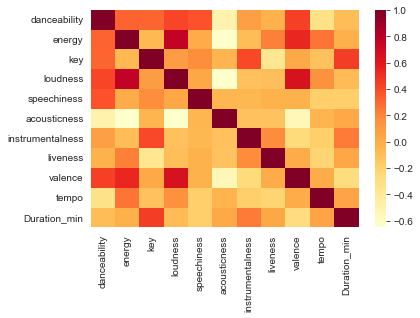

In [48]:
# Heat map for Major scales
sns.heatmap(MajorD.corr(), cmap="YlOrRd")


<AxesSubplot:>

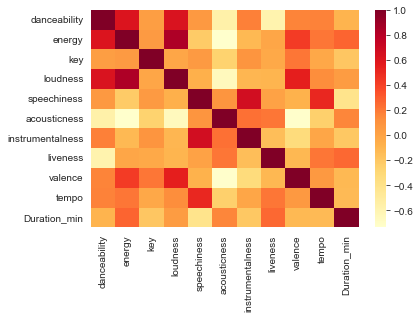

In [49]:
# Heat map for Less scales
sns.heatmap(MinorD.corr(), cmap="YlOrRd")



In [50]:
# We create the variable and assign the columns that we want to correlate
MajcorrD = MajorD[["danceability", "energy", "valence", "loudness", "tempo"]]
MincorrD = MinorD[["danceability", "energy", "valence", "loudness", "tempo"]]



<AxesSubplot:>

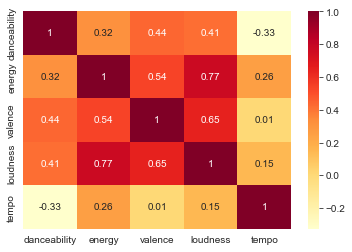

In [51]:
# Major scale correlation
sns.heatmap(MajcorrD.corr(), annot=True, cmap="YlOrRd")



<AxesSubplot:>

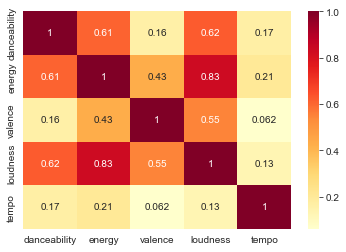

In [52]:
# Minor scale correlation
sns.heatmap(MincorrD.corr(), annot=True, cmap="YlOrRd")


In [53]:
# ANALYSIS:
# As we can observe the tracks with minor scales show us correlation better between the most important variables.


In [54]:
# KEYS:
# The key the track is in.
# Integers map to pitches using standard Pitch Class notation.
# E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.


In [55]:
df.loc[df["key"] == 0, "key"] = "C"
df.loc[df["key"] == 1, "key"] = "C#"
df.loc[df["key"] == 2, "key"] = "D"
df.loc[df["key"] == 3, "key"] = "D"
df.loc[df["key"] == 4, "key"] = "E"
df.loc[df["key"] == 5, "key"] = "F"
df.loc[df["key"] == 6, "key"] = "F#"
df.loc[df["key"] == 7, "key"] = "G"
df.loc[df["key"] == 8, "key"] = "G#"
df.loc[df["key"] == 9, "key"] = "A"
df.loc[df["key"] == 10, "key"] = "A#"
df.loc[df["key"] == 11, "key"] = "B"


c:\Users\amaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Popular keys')

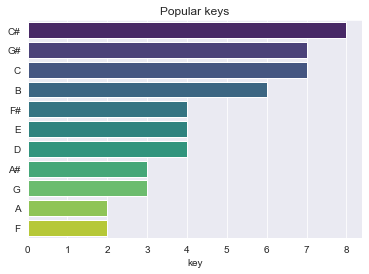

In [56]:
sns.set_style(style="darkgrid")
keys = df["key"].value_counts()
key_DF = pd.DataFrame(keys)
sns.barplot(key_DF.key, y=key_DF.index, palette="viridis")
plt.title("Popular keys")


In [57]:
# Parameter relationship by key
# As we can see, the most danceable tracks go by the key "G and F #" and those that have more energy have "F #, G and F"


In [58]:
df[["danceability", "energy", "valence", "key"]].groupby(by="key").mean().sort_values(
    by="danceability", ascending=False
)


,danceability,energy,valence
key,,,
G,0.773000,0.700000,0.521667
F#,0.771500,0.706750,0.648500
G#,0.752000,0.656429,0.677143
B,0.746167,0.666333,0.513000
E,0.722750,0.565750,0.376825
F,0.705000,0.690000,0.800000
C,0.654714,0.657571,0.548857
A#,0.638000,0.643000,0.475667
C#,0.612500,0.634625,0.465500


In [59]:
# CONCLUSION
# To answer the 2 initial questions asked by this dataset, we can say that there was only a correlation between energy and loudness.
# On the other hand, you can see that the main reason for people to like these songs is in relation to the tempo of the track.
# Most of the tracks were within the range "ALLEGRO" and "ANDANTE", which are characteristics of the genres: Hip hop, Reggaeton, Pop, Rap.

